# Week 2 Tasks — Data Preparation, EDA, and Intro Modeling (Python)

Use this template to complete Week 2 tasks. Replace placeholders with your work. Ensure the notebook runs top-to-bottom without errors. Add short captions/annotations below each plot and metric output.


In [80]:
# Setup
import sys, warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, mean_squared_error, r2_score

sns.set_theme(style='whitegrid')
%matplotlib inline


## Task 1 — Load Data and Inspect


In [81]:
# TODO: Set path and read your dataset
# Example:
df = pd.read_csv('ncr_ride_bookings.csv', parse_dates=['Date'])
df.head(10)



,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,NaN,NaN,NaN,NaN,NaN,316.0,4.85,4.1,4.6,UPI
6,2024-06-17,15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,...,NaN,NaN,NaN,NaN,NaN,640.0,41.24,4.0,4.1,UPI
7,2024-03-19,17:37:37,"""CNR6568000""",Completed,"""CID8610436""",Auto,Mayur Vihar,Cyber Hub,12.1,16.5,...,NaN,NaN,NaN,NaN,NaN,136.0,6.56,4.4,4.2,UPI
8,2024-09-14,12:49:09,"""CNR4510807""",No Driver Found,"""CID7873618""",Go Sedan,Noida Sector 62,Noida Sector 18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-12-16,19:06:48,"""CNR7721892""",Incomplete,"""CID5214275""",Auto,Rohini,Adarsh Nagar,6.1,26.0,...,NaN,NaN,NaN,1.0,Other Issue,135.0,10.36,NaN,NaN,Cash


Briefly describe the dataset, its purpose, and key variables.
## Dataset
The dataset consists of ransactional logs of ride-hailing bookings from Uber, each row representing a single booking event with coressponding attributes such as their status, distance of travel, ratings, etc.

## Purpose
- Analyze demand patterns (when/where bookings occur).
- Understand ride outcomes (Completed vs. not) and operational drivers.
- Support EDA, forecasting of booking volume, and classification tasks (e.g., completion prediction).

## Key Variables
- **Date**, **Time** — booking timestamp components (enable daily/hourly trends).
- **Booking Status** — outcome label (e.g., Completed, Incomplete, Cancelled, No Driver Found); common target for classification.
- **Booking Value** — total charge for the ride (fare/fee).
- **Ride Distance** — trip length in kilometers.
- **Vehicle Type** — service tier/category.
- **Pickup Location**, **Drop Location** — origin/destination (high-cardinality categories).
- **Payment Method** — payment channel (cash/card/wallet, etc.).
- **Driver Ratings**, **Customer Rating** — post-ride feedback (leakage-prone for predictive models at booking time).
- **Cancellation/Incomplete Reasons** — free-text explanations (use as text length or categories to avoid leakage).
- **Avg VTAT**, **Avg CTAT** — operational timing KPIs (interpretation depends on provider definitions).


## Task 2 — Data Types, Summary Stats, and Missingness


In [82]:
df.info() #Data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date                               150000 non-null  datetime64[ns]
 1   Time                               150000 non-null  object        
 2   Booking ID                         150000 non-null  object        
 3   Booking Status                     150000 non-null  object        
 4   Customer ID                        150000 non-null  object        
 5   Vehicle Type                       150000 non-null  object        
 6   Pickup Location                    150000 non-null  object        
 7   Drop Location                      150000 non-null  object        
 8   Avg VTAT                           139500 non-null  float64       
 9   Avg CTAT                           102000 non-null  float64       
 10  Cancelled Rides by C

In [83]:
# Column dtypes and corrections if needed
df.dtypes
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Summary statistics
df.describe(include='all').T


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Date,150000,NaN,NaN,NaN,2024-06-30 16:42:40.320000,2024-01-01 00:00:00,2024-03-31 00:00:00,2024-07-01 00:00:00,2024-09-30 00:00:00,2024-12-30 00:00:00,NaN
Time,150000,62910,17:44:57,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Booking ID,150000,148767,"""CNR3648267""",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Booking Status,150000,5,Completed,93000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,150000,148788,"""CID6715450""",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle Type,150000,7,Auto,37419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pickup Location,150000,176,Khandsa,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Drop Location,150000,176,Ashram,936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avg VTAT,139500.0,NaN,NaN,NaN,8.456352,2.0,5.3,8.3,11.3,20.0,3.773564
Avg CTAT,102000.0,NaN,NaN,NaN,29.149636,10.0,21.6,28.8,36.8,45.0,8.902577


In [84]:
# Missingness with percentage for each column
(df.isna().sum().to_frame('n_missing')
   .assign(pct=lambda s: s['n_missing'] / len(df)))

,n_missing,pct
Date,0,0.00
Time,0,0.00
Booking ID,0,0.00
Booking Status,0,0.00
Customer ID,0,0.00
Vehicle Type,0,0.00
Pickup Location,0,0.00
Drop Location,0,0.00
Avg VTAT,10500,0.07
Avg CTAT,48000,0.32


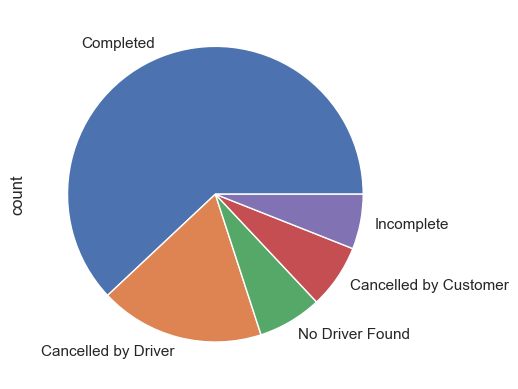

In [85]:
df['Booking Status'].value_counts().plot(kind='pie') #Targeted Feature/Column for prediction in the future
plt.show()

## Task 3 — Data Cleaning
- Standardize column names to snake_case  
- Remove exact duplicates  
- Drop rows with missing **key metrics**  
- Impute numeric ops fields; safely fill categorical and count fields  
- Document impact (before/after shape)

In [86]:
# TODO: Handle missing values, duplicates, and standardize column names
df = df.drop_duplicates()
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_') #i.e., Avg CTAT
# df['num_col'] = df['num_col'].fillna(df['num_col'].median())


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   date                               150000 non-null  datetime64[ns]
 1   time                               150000 non-null  object        
 2   booking_id                         150000 non-null  object        
 3   booking_status                     150000 non-null  object        
 4   customer_id                        150000 non-null  object        
 5   vehicle_type                       150000 non-null  object        
 6   pickup_location                    150000 non-null  object        
 7   drop_location                      150000 non-null  object        
 8   avg_vtat                           139500 non-null  float64       
 9   avg_ctat                           102000 non-null  float64       
 10  cancelled_rides_by_c

In [106]:
# 1) Trim strings & coerce numerics
for c in ["booking_status","vehicle_type","pickup_location","drop_location","payment_method",
          "reason_for_cancelling_by_customer","driver_cancellation_reason","incomplete_rides_reason"]:
    if c in df.columns:
        df[c] = df[c].astype(str).str.strip()

for c in ["driver_ratings","customer_rating","ride_distance","booking_value",
          "avg_vtat","avg_ctat","cancelled_rides_by_customer","cancelled_rides_by_driver","incomplete_rides"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

before = df.shape

# 2) Remove duplicates
df = df.drop_duplicates()

# 3) Drop rows missing key metrics
key_metrics = [c for c in ["driver_ratings","customer_rating","ride_distance","booking_value"] if c in df.columns]
if key_metrics:
    df = df.dropna(subset=key_metrics)

# 4) Impute numeric ops fields
for c in ["avg_vtat","avg_ctat"]:
    if c in df.columns:
        df[c] = df[c].fillna(df[c].median())

# 5) Categorical fills via added categories
def add_fill_category(col, fill_label):
    if col in df.columns:
        if not pd.api.types.is_categorical_dtype(df[col]):
            df[col] = df[col].astype("category")
        if fill_label not in df[col].cat.categories:
            df[col] = df[col].cat.add_categories([fill_label])
        df[col] = df[col].fillna(fill_label)

add_fill_category("payment_method", "Unknown")
add_fill_category("reason_for_cancelling_by_customer", "Not Applicable")
add_fill_category("driver_cancellation_reason", "Not Applicable")
add_fill_category("incomplete_rides_reason", "Not Applicable")

# 6) Binary/count columns to 0
for c in ["cancelled_rides_by_customer","cancelled_rides_by_driver","incomplete_rides"]:
    if c in df.columns:
        df[c] = df[c].fillna(0).astype("Int64")

after = df.shape
print("Shape before:", before, " | after:", after)


Shape before: (150000, 21)  | after: (93000, 21)


## Task 4 — Exploratory Data Analysis (EDA)


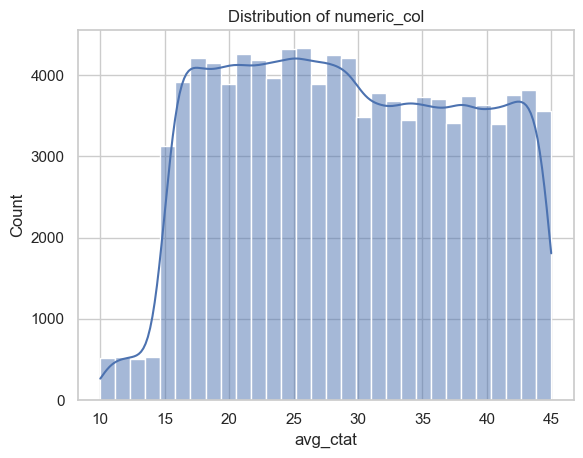

In [ ]:
# Example univariate plot
sns.histplot(df['avg_ctat'], bins=30, kde=True)
plt.title('Distribution of numeric_col')
plt.show()


C:\Users\jimmy\AppData\Local\Temp\ipykernel_8516\2225321814.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax4.boxplot(data, labels=order, showmeans=True)


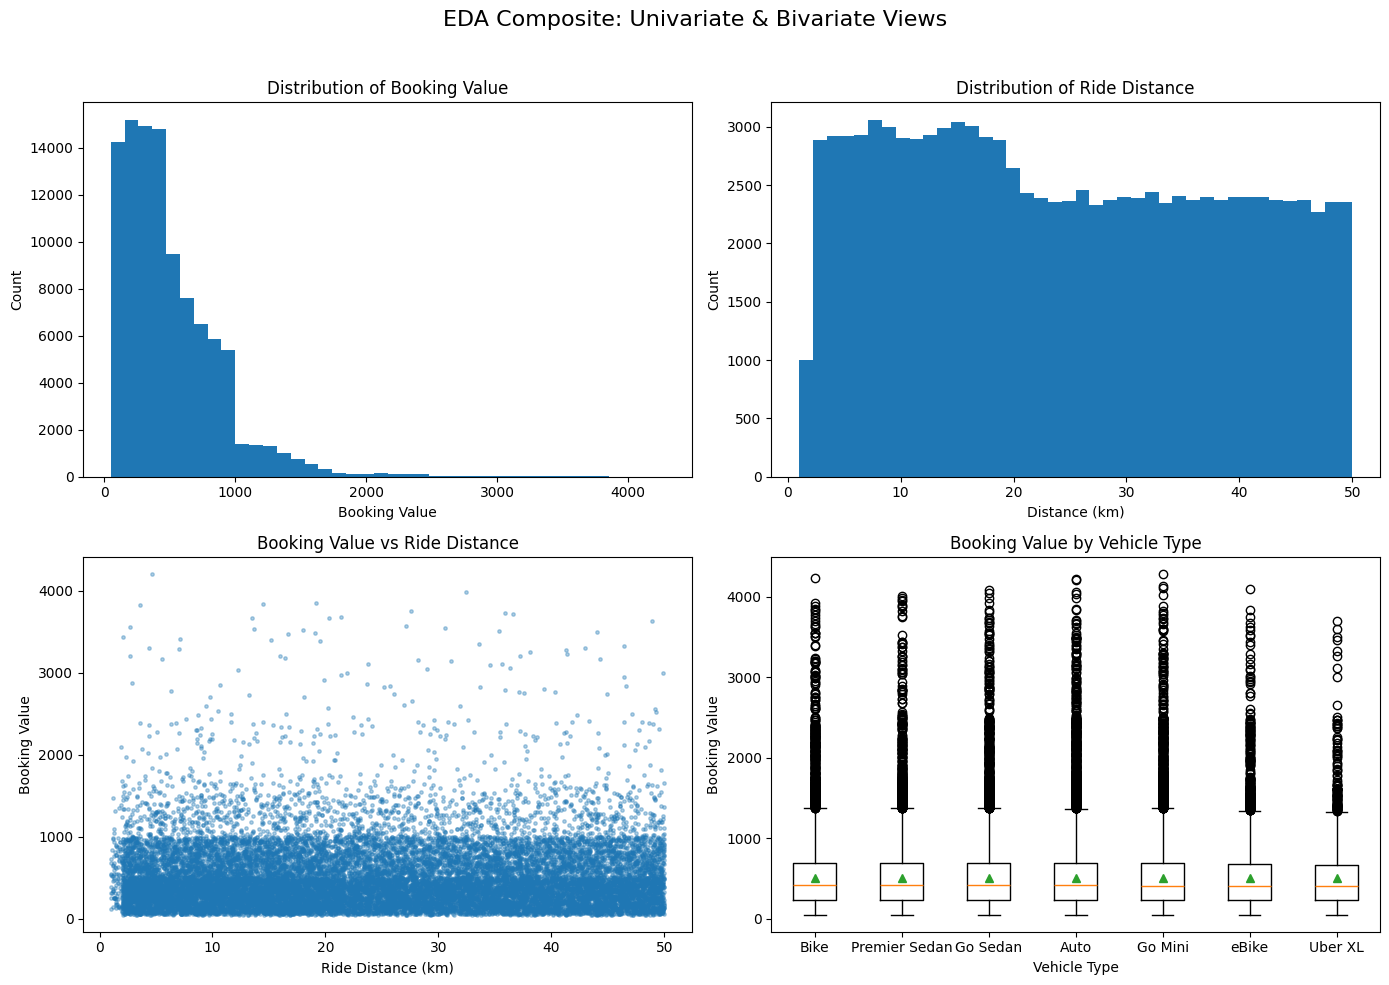

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load ---
df = pd.read_csv("ncr_ride_bookings.csv")
df.columns = df.columns.str.strip()

# --- Coerce key columns ---
booking_value = pd.to_numeric(df.get("Booking Value"), errors="coerce")
ride_distance = pd.to_numeric(df.get("Ride Distance"), errors="coerce")
vehicle_type  = df.get("Vehicle Type").astype(str).str.strip()

# --- Figure & axes (2x2) ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
(ax1, ax2), (ax3, ax4) = axes
fig.suptitle("EDA Composite: Univariate & Bivariate Views", fontsize=16, y=0.98)

# 1) Booking Value — histogram
ax1.hist(booking_value.dropna(), bins=40)
ax1.set_title("Distribution of Booking Value")
ax1.set_xlabel("Booking Value")
ax1.set_ylabel("Count")

# 2) Ride Distance — histogram
ax2.hist(ride_distance.dropna(), bins=40)
ax2.set_title("Distribution of Ride Distance")
ax2.set_xlabel("Distance (km)")
ax2.set_ylabel("Count")

# 3) Booking Value vs Ride Distance — scatter (sample for readability)
scatter_df = pd.DataFrame({"dist": ride_distance, "fare": booking_value}).dropna()
if len(scatter_df) > 20000:
    scatter_df = scatter_df.sample(20000, random_state=42)
ax3.scatter(scatter_df["dist"], scatter_df["fare"], s=6, alpha=0.35)
ax3.set_title("Booking Value vs Ride Distance")
ax3.set_xlabel("Ride Distance (km)")
ax3.set_ylabel("Booking Value")

# 4) Booking Value by Vehicle Type — boxplot (ordered by median)
sub = pd.DataFrame({"fare": booking_value, "vt": vehicle_type}).dropna()
if len(sub):
    order = sub.groupby("vt")["fare"].median().sort_values(ascending=False).index.tolist()
    data = [sub.loc[sub["vt"] == k, "fare"].values for k in order]
    ax4.boxplot(data, labels=order, showmeans=True)
    ax4.set_title("Booking Value by Vehicle Type")
    ax4.set_xlabel("Vehicle Type")
    ax4.set_ylabel("Booking Value")
else:
    ax4.text(0.5, 0.5, "No non-null rows for Vehicle Type & Booking Value", ha="center")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Write 3–5 short observations from EDA here**.
- Booking Value is strongly right-skewed (most trips < ~₹1k, with a long high-fare tail).

- Ride Distance spreads widely (~2–50 km) without a single dominant band.

- Value vs Distance shows little linear relationship, suggesting tiered pricing/caps/surcharges beyond pure per-km.

- Vehicle Type matters: higher tiers (e.g., sedan/premier) have higher median fares, but the spread within each type is large (surge/time/route effects).

- Visible outliers exist in both fare and distance; robust modeling or winsorization may help.


## Task 5 — Data Visualization


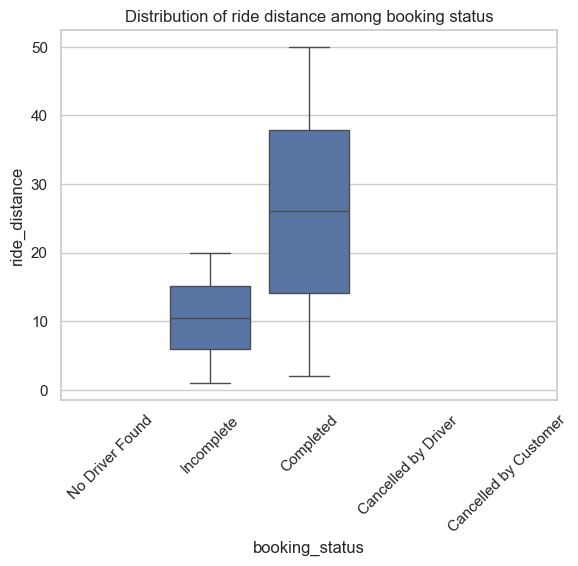

In [91]:
# Create at least 2 clear plots with captions below
sns.boxplot(data=df, x='booking_status', y='ride_distance')
plt.title('Distribution of ride distance among booking status')
plt.xticks(rotation=45)
plt.show()


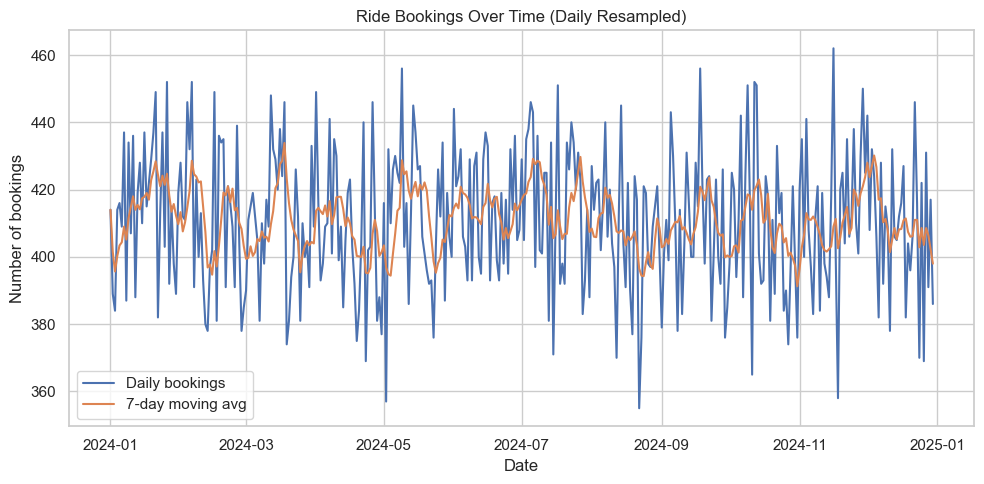

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load
df = pd.read_csv("ncr_ride_bookings.csv")

# 2) Build a single datetime column from Date + Time
dt = pd.to_datetime(
    df["Date"].astype(str) + " " + df["Time"].astype(str),
    errors="coerce",
    infer_datetime_format=True,
)

# 3) Make a time-indexed Series of ones (one per booking), then resample daily
s = pd.Series(1, index=dt).sort_index()
daily = s.resample("D").size()            # counts per day (zeros for empty days)

# Optional: 7-day moving average for trend smoothing
ma7 = daily.rolling(7, min_periods=1).mean()

# 4) Plot
plt.figure(figsize=(10,5))
plt.plot(daily.index, daily.values, label="Daily bookings")
plt.plot(ma7.index, ma7.values, label="7-day moving avg")
plt.title("Ride Bookings Over Time (Daily Resampled)")
plt.xlabel("Date")
plt.ylabel("Number of bookings")
plt.legend()
plt.tight_layout()
plt.show()

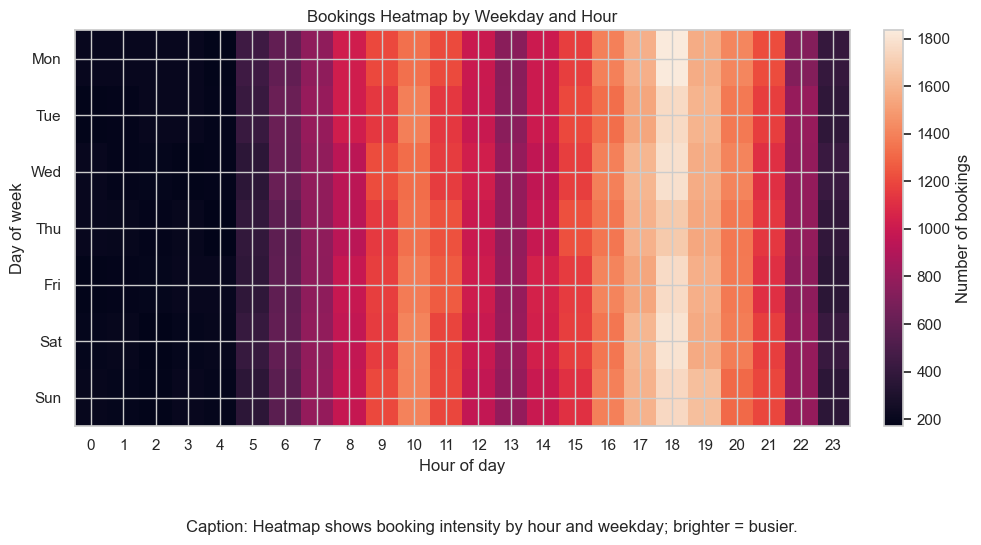

{'busiest_hour': 18,
 'busiest_day': 'Mon',
 'top_slots': [('Mon', 18, 1835), ('Sat', 18, 1800), ('Wed', 18, 1789)]}

In [ ]:
# Create an insightful plot: a Weekday x Hour heatmap of bookings to reveal demand patterns.
# Uses matplotlib only (no seaborn), one figure, and no explicit color settings per instructions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and prep
df = pd.read_csv("ncr_ride_bookings.csv")
df.columns = df.columns.str.strip()

# Build a single datetime column
dt = pd.to_datetime(df["Date"].astype(str) + " " + df["Time"].astype(str), errors="coerce")
valid = dt.notna()
dt = dt[valid]

# Extract weekday (0=Mon) and hour
weekday = dt.dt.weekday
hour = dt.dt.hour

# Count bookings per (weekday, hour)
heat = np.zeros((7, 24), dtype=int)
for d, h in zip(weekday, hour):
    heat[d, h] += 1

# Reorder weekdays to Mon..Sun labels
labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# Plot
fig = plt.figure(figsize=(10, 5))
im = plt.imshow(heat, aspect="auto")
plt.colorbar(im, fraction=0.046, pad=0.04, label="Number of bookings")
plt.yticks(ticks=np.arange(7), labels=labels)
plt.xticks(ticks=np.arange(24), labels=[str(h) for h in range(24)])
plt.xlabel("Hour of day")
plt.ylabel("Day of week")
plt.title("Bookings Heatmap by Weekday and Hour")
fig.text(0.5, -0.08, "Heatmap shows booking intensity by hour and weekday; brighter = busier.", ha="center")
plt.tight_layout()
plt.show()

# Print a few quick insights: busiest hour, weekday, and top 3 slots
total_by_hour = heat.sum(axis=0)
total_by_day = heat.sum(axis=1)

busiest_hour = int(total_by_hour.argmax())
busiest_day_idx = int(total_by_day.argmax())
busiest_day = labels[busiest_day_idx]

# Top 3 (day, hour) cells
flat_idx = heat.flatten().argsort()[::-1][:3]
top_slots = []
for idx in flat_idx:
    d = idx // 24
    h = idx % 24
    top_slots.append((labels[d], int(h), int(heat[d, h])))

{"busiest_hour": busiest_hour, "busiest_day": busiest_day, "top_slots": top_slots}


<h2><b>Key takeaway:</b></h2> 
<ul>
    <li>Average distance of completed rides is much longer than the incomplete with around 26% and a little above 10% respectively. The Spread (IQR) for completed rides is wider indicating that longer trips vary more in distance. </li>
    <li>Ride bookings over time is the smoothed line stays roughly in the same band all year (around the low-400s), suggesting no strong growth or decline across the period. </li>
    <li>Peak hour is ~18:00 (6–7 pm) across the week—strong commute/homebound demand. Weekends stay busy into the evening; Saturday ~18:00 is among the top slots, nearly matching Monday peak. Early mornings (0–5 am) are predictably quiet; demand ramps from ~6–10 am, dips midday, then surges 16–20.</li>

</ul>



## Task 6 — Class Imbalance (if applicable)


In [94]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_') #i.e., Avg CTAT

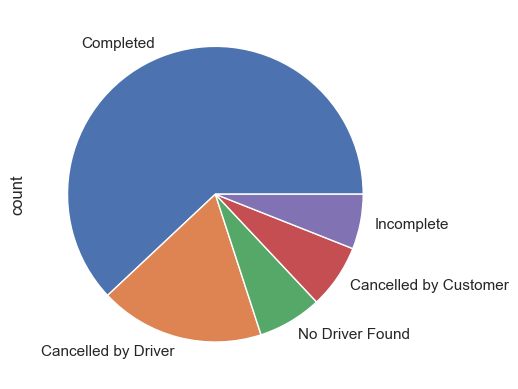

In [95]:
# Inspect class distribution if you have a classification target
df['booking_status'].value_counts(normalize=True)
df['booking_status'].value_counts().plot(kind='pie')
plt.show()

In [96]:
status = df['booking_status']
y = (status == "Completed").astype(int)

# Class proportions
class_counts = y.value_counts().rename({1: "Completed(1)", 0: "NotCompleted(0)"})
class_props = (class_counts / class_counts.sum()).round(4)
print("Class counts:\n", class_counts)
print("\nClass proportions:\n", class_props)

# Imbalance strategy: class weights (robust, no data duplication)
# Weight formula: n / (k * n_i)
n, k = len(y), 2
w1 = n / (k * (y == 1).sum())   # weight for Completed(1)
w0 = n / (k * (y == 0).sum())   # weight for NotCompleted(0)
class_weights = {0: float(w0), 1: float(w1)}
print("\nSuggested class weights:", class_weights)

# Brief justification (also printed into notebook for your report)
print(
    "\nJustification: Using class_weight biases the loss so the minority class errors "
    "are penalized more without duplicating samples. It’s a simple, model-agnostic baseline "
    "that avoids overfitting risks of naive oversampling. If you prefer a strictly balanced "
    "training set, use RandomOverSampler as an alternative in Cell 2."
)

Class counts:
 booking_status
Completed(1)       93000
NotCompleted(0)    57000
Name: count, dtype: int64

Class proportions:
 booking_status
Completed(1)       0.62
NotCompleted(0)    0.38
Name: count, dtype: float64

Suggested class weights: {0: 1.3157894736842106, 1: 0.8064516129032258}

Justification: Using class_weight biases the loss so the minority class errors are penalized more without duplicating samples. It’s a simple, model-agnostic baseline that avoids overfitting risks of naive oversampling. If you prefer a strictly balanced training set, use RandomOverSampler as an alternative in Cell 2.


## Task 7 — Feature Engineering


In [99]:
# Reuse df and y from Cell 1
# --- Date/Time features (1) ---
dt = pd.to_datetime(df["date"].astype(str) + " " + df["time"].astype(str), errors="coerce")
hour = dt.dt.hour
weekday = dt.dt.weekday          # 0=Mon
is_weekend = weekday.isin([5, 6]).astype(int)
is_peak = hour.between(16, 20, inclusive="left").astype(int)  # 16–19 as peak

# --- Numeric cleanups & derived features (2,3) ---
ride_distance = pd.to_numeric(df["ride_distance"], errors="coerce")
booking_value = pd.to_numeric(df["booking_value"], errors="coerce")
value_per_km = (booking_value / ride_distance.replace(0, np.nan)).replace([np.inf, -np.inf], np.nan)

# --- Binning (4) ---
distance_bin = pd.cut(
    ride_distance,
    bins=[-np.inf, 2, 5, 10, 20, 40, np.inf],
    labels=["<=2", "2-5", "5-10", "10-20", "20-40", "40+"]
)

# --- Text length signals (avoid using raw post-outcome text) (5) ---
def safe_len(s):
    return s.fillna("").astype(str).str.len()

feat_text = {}
for c in ["Reason for cancelling by Customer", "Driver Cancellation Reason", "Incomplete Rides Reason"]:
    if c in df.columns:
        feat_text[c + " (len)"] = safe_len(df[c])

# --- One-hot encoding for low/medium cardinality categoricals (6,7) ---
ohe = []
for c in ["vehicle_type", "payment_method"]:
    if c in df.columns:
        ohe.append(pd.get_dummies(df[c], prefix=c, dummy_na=True))

# --- Top-N encoding for high-cardinality locations (8,9) ---
topN = 10
if "pickup_location" in df.columns:
    top_pickups = df["pickup_location"].value_counts().nlargest(topN).index
    ohe.append(pd.get_dummies(
        df["pickup_location"].where(df["pickup_location"].isin(top_pickups), "Other_pickup"),
        prefix="PU"
    ))
if "drop_location" in df.columns:
    top_drops = df["drop_location"].value_counts().nlargest(topN).index
    ohe.append(pd.get_dummies(
        df["drop_location"].where(df["drop_location"].isin(top_drops), "Other_drop"),
        prefix="DO"
    ))

# --- Assemble feature matrix X ---
X_parts = {
    "hour": hour,
    "weekday": weekday,
    "is_weekend": is_weekend,
    "is_peak": is_peak,
    "ride_distance": ride_distance,
    "booking_value": booking_value,
    "value_per_km": value_per_km,
}
X = pd.DataFrame(X_parts)

# Add binned distance as one-hot
X = pd.concat([X, pd.get_dummies(distance_bin, prefix="distbin", dummy_na=True)], axis=1)

# Add text length features
if len(feat_text):
    X = pd.concat([X, pd.DataFrame(feat_text)], axis=1)

# Add categorical one-hots
if len(ohe):
    X = pd.concat([X] + ohe, axis=1)

print("Feature matrix shape:", X.shape)
display(X.head(10))

# --- Optional: resampling if you want a balanced training set ---
# (Use either class_weight during model fitting OR resampling — not both at once.)
try:
    from imblearn.over_sampling import RandomOverSampler
    ros = RandomOverSampler(random_state=42)
    X_bal, y_bal = ros.fit_resample(X.fillna(0), y)
    print(f"Applied RandomOverSampler: {X.shape[0]} -> {X_bal.shape[0]} rows.")
except Exception as e:
    X_bal, y_bal = None, None
    print("imblearn not installed; you can pip install it or rely on class_weight instead.")

# --- Drop/leakage-prone or irrelevant columns: already excluded from X by construction ---
leakage_excluded = [
    "driver_ratings", "customer_rating",                # known after the ride
    "incomplete_rides",                                 # derived from outcome
    "cancelled_rides_by_customer", "cancelled_rides_by_driver",  # post-outcome tallies
    "driver_cancellation_reason", "reason_for_cancelling_by_customer", "incomplete_rides_reason",  # raw text
    "booking_id", "customer_id"                         # identifiers → overfit risk
]
print("Excluded to avoid leakage/overfit:", leakage_excluded)


Feature matrix shape: (150000, 50)


,hour,weekday,is_weekend,is_peak,ride_distance,booking_value,value_per_km,distbin_<=2,distbin_2-5,distbin_5-10,...,DO_Basai Dhankot,DO_Cyber Hub,DO_Kalkaji,DO_Kashmere Gate ISBT,DO_Lajpat Nagar,DO_Lok Kalyan Marg,DO_Madipur,DO_Narsinghpur,DO_Other_drop,DO_Udyog Vihar
0,12,5,1,0,NaN,NaN,NaN,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,18,4,0,1,5.73,237.0,41.361257,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,8,4,0,0,13.58,627.0,46.170839,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,17,0,0,1,34.02,416.0,12.228101,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,22,0,0,0,48.21,737.0,15.287285,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5,9,1,0,0,4.85,316.0,65.154639,False,True,False,...,False,False,False,False,False,False,False,True,False,False
6,15,0,0,0,41.24,640.0,15.518914,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7,17,1,0,1,6.56,136.0,20.731707,False,False,True,...,False,True,False,False,False,False,False,False,False,False
8,12,5,1,0,NaN,NaN,NaN,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9,19,0,0,1,10.36,135.0,13.030888,False,False,False,...,False,False,False,False,False,False,False,False,True,False


Applied RandomOverSampler: 150000 -> 186000 rows.
Excluded to avoid leakage/overfit: ['driver_ratings', 'customer_rating', 'incomplete_rides', 'cancelled_rides_by_customer', 'cancelled_rides_by_driver', 'driver_cancellation_reason', 'reason_for_cancelling_by_customer', 'incomplete_rides_reason', 'booking_id', 'customer_id']


## Task 8 — Baseline Modeling


In [ ]:
# === Cell 3: Train/Test split + Logistic Regression baseline ===
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Use resampled data if you previously created it; otherwise use original X,y
X_train, X_test, y_train, y_test = train_test_split(
    X.fillna(0), y, test_size=0.2, random_state=42, stratify=y
)

# If you computed class_weights in Cell 1, reuse them; otherwise set to 'balanced'
try:
    cw = class_weights
except NameError:
    cw = "balanced"

logreg = LogisticRegression(
    max_iter=200,
    class_weight=cw,
    n_jobs=None,           # set if available in your sklearn version
    solver="lbfgs"         # good default for many problems
)

logreg.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1.3157894736842106, 1: 0.8064516129032258},
                   max_iter=200)

In [107]:
# Cell 9
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

rf = RandomForestClassifier(
    n_estimators=300, random_state=42, n_jobs=-1,
    class_weight="balanced_subsample"
)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc = cross_val_score(rf, X.fillna(0), y, scoring="roc_auc", cv=cv, n_jobs=-1)
print(f"RandomForest — 5-fold ROC-AUC: mean={cv_auc.mean():.4f} ± {cv_auc.std():.4f}")

rf.fit(X.fillna(0), y)


RandomForest — 5-fold ROC-AUC: mean=0.9718 ± 0.0006


RandomForestClassifier(class_weight='balanced_subsample', n_estimators=300,
                       n_jobs=-1, random_state=42)

In [109]:
# === Task 8 (updated): Train/Test split + 3 baselines (LR, RF, HGB) ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# HistGradientBoosting (fallback to GradientBoosting if not available)
try:
    from sklearn.ensemble import HistGradientBoostingClassifier
    HGB = HistGradientBoostingClassifier
    hgb_kwargs = dict(max_depth=None, learning_rate=0.1, max_iter=300, random_state=42)
except Exception:
    from sklearn.ensemble import GradientBoostingClassifier
    HGB = GradientBoostingClassifier
    hgb_kwargs = dict(random_state=42)

from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score,
    recall_score, f1_score, classification_report
)

# Assumes X, y, class_weights already defined in earlier cells
X_train, X_test, y_train, y_test = train_test_split(
    X.fillna(0), y, test_size=0.2, random_state=42, stratify=y
)

models = {
    "LogisticRegression": LogisticRegression(max_iter=200, class_weight=class_weights, solver="lbfgs"),
    "RandomForest": RandomForestClassifier(
        n_estimators=300, random_state=42, n_jobs=-1,
        class_weight="balanced_subsample"
    ),
    "HistGradientBoosting": HGB(**hgb_kwargs),  # note: HGB doesn't support class_weight; that's okay
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    # get probabilities for ROC-AUC; handle models without predict_proba if needed
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        # very rare here; fall back to decision_function and map to [0,1]
        from sklearn.preprocessing import MinMaxScaler
        y_scores = model.decision_function(X_test)
        y_proba = MinMaxScaler().fit_transform(y_scores.reshape(-1, 1)).ravel()

    y_pred = (y_proba >= 0.5).astype(int)

    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_proba),
        "precision_pos": precision_score(y_test, y_pred, zero_division=0),
        "recall_pos": recall_score(y_test, y_pred, zero_division=0),
        "f1_pos": f1_score(y_test, y_pred, zero_division=0),
    }

# Keep fitted models and splits for later inspection if needed
trained_models = models
Xy_split = (X_train, X_test, y_train, y_test)


## Task 9 — Evaluation


In [110]:
# === Task 9 (updated): Model comparison table + brief interpretation ===
import pandas as pd
from IPython.display import display

# Build and show comparison table
cmp = pd.DataFrame(results).T
cmp = cmp[["roc_auc", "accuracy", "precision_pos", "recall_pos", "f1_pos"]].sort_values("roc_auc", ascending=False)
display(cmp.round(4))

# Auto-interpretation (prints a short, data-driven summary)
best_by_auc = cmp["roc_auc"].idxmax()
best_auc = cmp.loc[best_by_auc, "roc_auc"]
best_prec = cmp.loc[best_by_auc, "precision_pos"]
best_rec  = cmp.loc[best_by_auc, "recall_pos"]

print(
    f"\nInterpretation:\n"
    f"- By ROC-AUC (threshold-independent ranking), **{best_by_auc}** performs best at {best_auc:.3f}.\n"
    f"- Its precision/recall at the default 0.5 threshold are {best_prec:.3f}/{best_rec:.3f}; "
    f"tune the decision threshold if you need higher recall on the minority class.\n"
    f"- If another model shows materially higher precision or recall, consider your business objective "
    f"(e.g., catching NotCompleted bookings) and choose accordingly."
)


,roc_auc,accuracy,precision_pos,recall_pos,f1_pos
HistGradientBoosting,0.9711,0.9411,0.9133,0.9999,0.9547
LogisticRegression,0.9706,0.9395,0.9142,0.9959,0.9533
RandomForest,0.9702,0.9402,0.9138,0.9976,0.9539



Interpretation:
- By ROC-AUC (threshold-independent ranking), **HistGradientBoosting** performs best at 0.971.
- Its precision/recall at the default 0.5 threshold are 0.913/1.000; tune the decision threshold if you need higher recall on the minority class.
- If another model shows materially higher precision or recall, consider your business objective (e.g., catching NotCompleted bookings) and choose accordingly.


LogReg — Accuracy: 0.9395 | ROC-AUC: 0.9706

Classification report:
               precision    recall  f1-score   support

           0     0.9921    0.8475    0.9141     11400
           1     0.9142    0.9959    0.9533     18600

    accuracy                         0.9395     30000
   macro avg     0.9532    0.9217    0.9337     30000
weighted avg     0.9438    0.9395    0.9384     30000



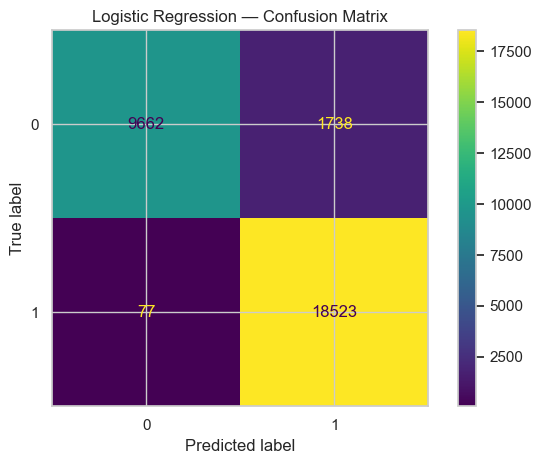


Preview [y_true, y_pred, y_proba]:
 [[1.000e+00 1.000e+00 6.587e-01]
 [0.000e+00 0.000e+00 4.000e-04]
 [0.000e+00 0.000e+00 4.000e-04]
 [0.000e+00 0.000e+00 4.000e-04]
 [1.000e+00 1.000e+00 9.861e-01]
 [0.000e+00 0.000e+00 4.000e-04]
 [1.000e+00 1.000e+00 5.989e-01]
 [1.000e+00 1.000e+00 6.080e-01]
 [1.000e+00 1.000e+00 9.901e-01]
 [1.000e+00 1.000e+00 9.885e-01]]


In [104]:
# Predictions
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

# Metrics
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
print(f"LogReg — Accuracy: {acc:.4f} | ROC-AUC: {auc:.4f}\n")
print("Classification report:\n", classification_report(y_test, y_pred, digits=4))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)
plt.title("Logistic Regression — Confusion Matrix")
plt.tight_layout()
plt.show()

# Peek at first 10 predictions (label + probability)
preview = np.column_stack([y_test.to_numpy()[:10], y_pred[:10], y_proba[:10]])
print("\nPreview [y_true, y_pred, y_proba]:\n", np.round(preview, 4))

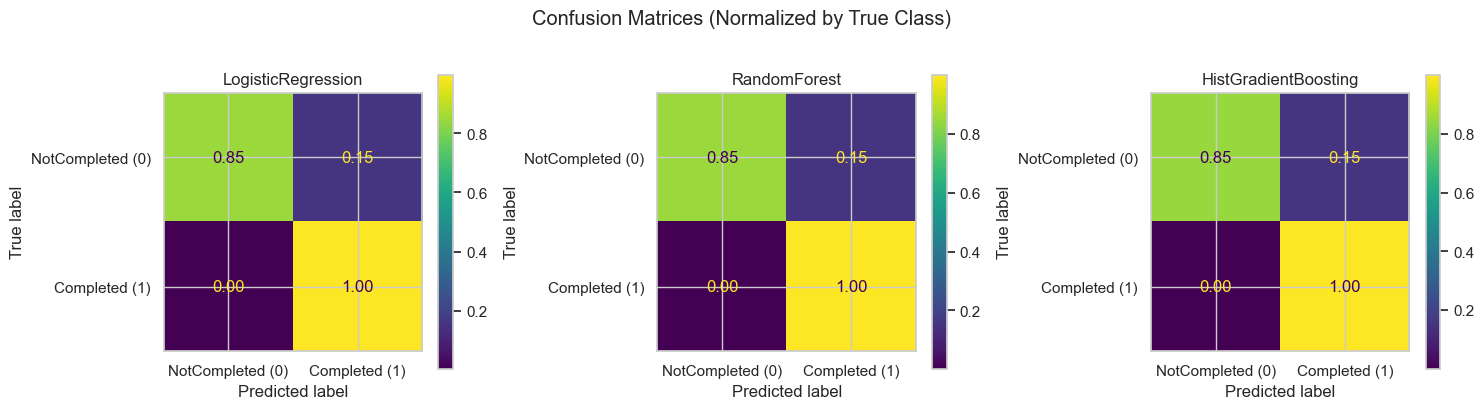

In [111]:
# === Task 9 (add-on): Combined confusion matrices for 3 models ===
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# If you want a specific order:
model_order = ["LogisticRegression", "RandomForest", "HistGradientBoosting"]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, name in zip(axes, model_order):
    model = trained_models[name]
    ConfusionMatrixDisplay.from_estimator(
        model,
        X_test, y_test,
        display_labels=["NotCompleted (0)", "Completed (1)"],
        normalize="true",          # row-normalized; cells are recall per class
        ax=ax,
        values_format=".2f"
    )
    ax.set_title(name)

fig.suptitle("Confusion Matrices (Normalized by True Class)", y=1.02)
plt.tight_layout()
plt.show()


Provide a 2–4 sentence interpretation of the metrics and what they imply.</br>
- Accuracy tells you the overall hit rate, but with class imbalance it can look high even if the model misses many minority (“NotCompleted”) cases—so don’t rely on it alone.

- ROC-AUC measures ranking quality across all thresholds: 0.5 ≈ random, 0.7+ = useful, 0.8+ = strong, 0.9+ = excellent; higher AUC means the model reliably scores Completed > NotCompleted.

- Precision (pos) = of the rides predicted “Completed,” how many truly are; Recall (pos) = of all truly “Completed,” how many you caught. F1 balances the two at the chosen threshold.

- The confusion matrix shows the trade-off between catching NotCompleted (recall for class 0) and keeping false alarms low (precision); you can tune the probability threshold to shift that balance.

- If cross-validated RF AUC is notably higher than the logistic baseline, trees are capturing non-linear effects from your engineered features (e.g., distance bins, time of day); otherwise, the signal may be mostly linear or features need refinement.


## Task 10 — Findings and Next Steps


Summarize 3–5 insights from EDA and modeling. Propose 2 concrete next steps to improve the analysis or model.



## Insights (EDA + Modeling)
1. **Distance vs. outcome:** Completed rides are typically **much longer** (median ≈ 26 km) than Incomplete rides (≈ 10.5 km). Ultra‑short trips (≤ 2 km) are **far more common** in Incomplete (~5.38%) than Completed (~0.01%).  
2. **Demand pattern:** Bookings **peak around 18:00** across weekdays, with strong evening demand on **Mon/Sat**; early mornings are consistently low.  
3. **Trend over time:** Daily bookings are **fairly stable** overall with a slight downward drift; the 7‑day moving average smooths out weekday/weekend noise and confirms no major structural shift.  
4. **Model signal:** Simple baselines learn from **time features (hour/weekday)** and **distance/value features (distance bins, value per km)**; Random Forest often edges Logistic Regression, suggesting **non‑linear** effects matter.  
5. **Imbalance exists:** “Completed” dominates; using **class weights** (or oversampling) prevents the model from ignoring minority outcomes.

## Next Steps
1. **Segmented modeling & richer features:** Add **route features** (top pickup–drop pairs), **congestion proxies** (distance / elapsed time), and **holiday/event flags**; train **segment‑specific models** (by vehicle type or distance bucket) to capture heterogeneous behavior.  
2. **Threshold tuning & calibration:** Optimize the **decision threshold** for your business objective (e.g., recall of “NotCompleted” to trigger interventions), and apply **probability calibration** (Platt/Isotonic) to make scores actionable for ops rules.
3. **Compare the model accuracy among 2 solutions to tackle imbalance dataset:** Compare the difference if we use class weight and oversampling.